In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
data=pd.read_excel('datamiss.xlsx')
data

,nom,age,note,pays,sexe,taille
0,Benteke,20.0,17.0,RDC,M,184.0
1,Junior,21.0,16.0,RDC,M,170.0
2,Yvan,25.0,17.0,CAMEROUN,M,169.0
3,Rigobert,30.0,15.0,CAMEROUN,M,NaN
4,Meité,25.0,16.0,COTE D'IVOIRE,F,165.0
5,Aram,20.0,14.0,SENEGAL,F,NaN
6,Idriss,NaN,NaN,CAMEROUN,M,180.0
7,Balde,19.0,12.0,SENEGAL,M,180.0
8,Esther,22.0,15.0,NIGERIA,F,174.0
9,Nazir,NaN,16.0,GHANA,M,181.0


In [138]:
classe=['t','t','t','b','t','b','b','m','b','t','b','m','m','m']

In [139]:
data['classe']=classe
data

,nom,age,note,pays,sexe,taille,classe
0,Benteke,20.0,17.0,RDC,M,184.0,t
1,Junior,21.0,16.0,RDC,M,170.0,t
2,Yvan,25.0,17.0,CAMEROUN,M,169.0,t
3,Rigobert,30.0,15.0,CAMEROUN,M,NaN,b
4,Meité,25.0,16.0,COTE D'IVOIRE,F,165.0,t
5,Aram,20.0,14.0,SENEGAL,F,NaN,b
6,Idriss,NaN,NaN,CAMEROUN,M,180.0,b
7,Balde,19.0,12.0,SENEGAL,M,180.0,m
8,Esther,22.0,15.0,NIGERIA,F,174.0,b
9,Nazir,NaN,16.0,GHANA,M,181.0,t


In [119]:
data['pays'].value_counts()

CAMEROUN         5
RDC              3
SENEGAL          2
COTE D'IVOIRE    1
NIGERIA          1
GHANA            1
BOURKINA         1
Name: pays, dtype: int64

In [120]:
data['sexe'].value_counts()

M    10
F     3
Name: sexe, dtype: int64

In [125]:
data['age'].value_counts()

25.0    3
21.0    2
20.0    2
24.0    1
22.0    1
19.0    1
30.0    1
Name: age, dtype: int64

In [127]:
data['taille'].value_counts()

180.0    2
179.0    1
168.0    1
181.0    1
174.0    1
165.0    1
169.0    1
170.0    1
184.0    1
Name: taille, dtype: int64

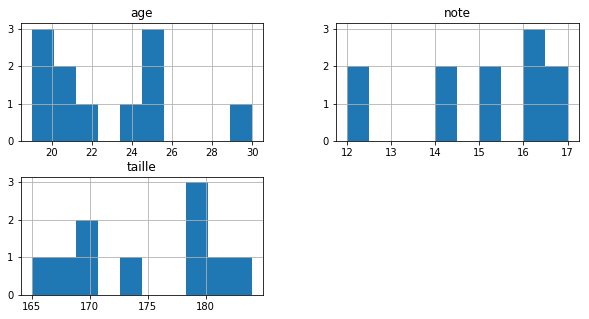

In [129]:
data.hist(bins=10, figsize=(10,5)) # bins juste les effectifs
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,

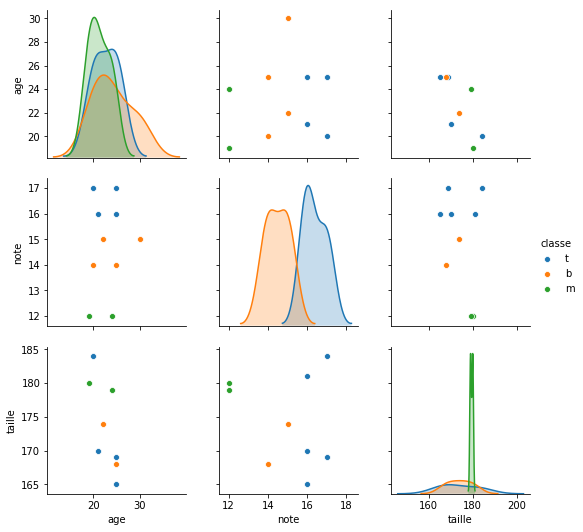

In [111]:
sns.pairplot(data=data,hue='classe')

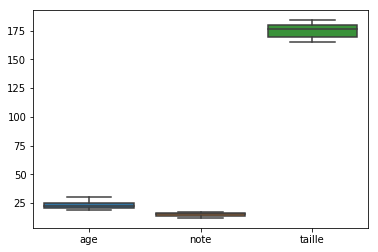

In [112]:
sns.boxplot(data=data)

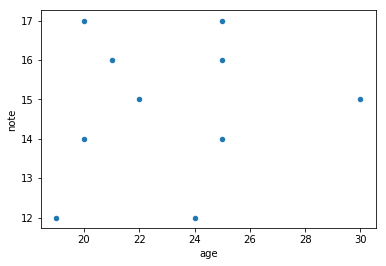

In [113]:
data.plot(x='age',y='note',kind='scatter')

In [58]:
y=pd.DataFrame(data['classe'])
X1=data.drop(['classe','sexe','pays','nom'],axis=1)

In [59]:
X1.head(1)

,age,note,taille
0,20.0,17.0,184.0


In [60]:
correlation=X1.corr()
correlation

,age,note,taille
age,1.000000,0.150045,-0.711819
note,0.150045,1.000000,-0.219429
taille,-0.711819,-0.219429,1.000000


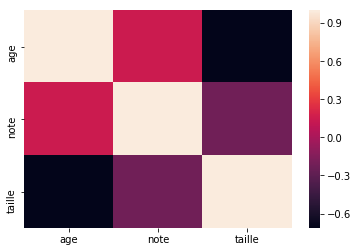

In [61]:
sns.heatmap(correlation)

## Preparing data for machine leraning algorithms

In [62]:
X=data.drop('classe',axis=1)
X

,nom,age,note,pays,sexe,taille
0,Benteke,20.0,17.0,RDC,M,184.0
1,Junior,21.0,16.0,RDC,M,170.0
2,Yvan,25.0,17.0,CAMEROUN,M,169.0
3,Rigobert,30.0,15.0,CAMEROUN,M,NaN
4,Meité,25.0,16.0,COTE D'IVOIRE,F,165.0
5,Aram,20.0,14.0,SENEGAL,F,NaN
6,Idriss,NaN,NaN,CAMEROUN,M,180.0
7,Balde,19.0,12.0,SENEGAL,M,180.0
8,Esther,22.0,15.0,NIGERIA,F,174.0
9,Nazir,NaN,16.0,GHANA,M,181.0


In [83]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,14.0,22.909091,2.840762,19.0,21.000000,22.909091,24.75,30.0
note,14.0,14.909091,1.541954,12.0,14.227273,14.954545,16.00,17.0
taille,14.0,175.000000,5.505242,165.0,171.000000,175.000000,179.75,184.0


In [76]:
X['sexe'].mode()

0    M
dtype: object

#### Imputation tradutionelle

In [84]:
X=X.fillna(X.mean())
X['sexe']=X['sexe'].fillna('M')
X

,nom,age,note,pays,sexe,taille
0,Benteke,20.000000,17.000000,RDC,M,184.0
1,Junior,21.000000,16.000000,RDC,M,170.0
2,Yvan,25.000000,17.000000,CAMEROUN,M,169.0
3,Rigobert,30.000000,15.000000,CAMEROUN,M,175.0
4,Meité,25.000000,16.000000,COTE D'IVOIRE,F,165.0
5,Aram,20.000000,14.000000,SENEGAL,F,175.0
6,Idriss,22.909091,14.909091,CAMEROUN,M,180.0
7,Balde,19.000000,12.000000,SENEGAL,M,180.0
8,Esther,22.000000,15.000000,NIGERIA,F,174.0
9,Nazir,22.909091,16.000000,GHANA,M,181.0


## Imputation grace à scikit learn

In [130]:
X=data.drop(['classe','sexe','pays','nom'],axis=1)

In [131]:
from sklearn.preprocessing import Imputer

In [132]:
imputer=Imputer(strategy='mean')

In [133]:
imputer.fit(X) ## On calcul la moyenne, la variance, la mediane...

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [134]:
imputer.statistics_ ## pour voir le resultat

array([ 22.90909091,  14.90909091, 175.        ])

In [135]:
X.mean().values ## Naturellement

array([ 22.90909091,  14.90909091, 175.        ])

In [136]:
X=imputer.transform(X)
X

array([[ 20.        ,  17.        , 184.        ],
       [ 21.        ,  16.        , 170.        ],
       [ 25.        ,  17.        , 169.        ],
       [ 30.        ,  15.        , 175.        ],
       [ 25.        ,  16.        , 165.        ],
       [ 20.        ,  14.        , 175.        ],
       [ 22.90909091,  14.90909091, 180.        ],
       [ 19.        ,  12.        , 180.        ],
       [ 22.        ,  15.        , 174.        ],
       [ 22.90909091,  16.        , 181.        ],
       [ 25.        ,  14.        , 168.        ],
       [ 24.        ,  12.        , 179.        ],
       [ 22.90909091,  14.90909091, 175.        ],
       [ 21.        ,  14.90909091, 175.        ]])

### Codification traditionnelle

In [90]:
X['pays'].values

array(['RDC', 'RDC', 'CAMEROUN', 'CAMEROUN', "COTE D'IVOIRE", 'SENEGAL',
       'CAMEROUN', 'SENEGAL', 'NIGERIA', 'GHANA', 'CAMEROUN', 'CAMEROUN',
       'RDC', 'BOURKINA'], dtype=object)

In [63]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [69]:
len(X_train),len(X_test)

(11, 3)

In [ ]:
X

In [20]:
# from sklearn.datasets import load_boston

In [22]:
# boston=load_boston()
# boston

In [23]:
# boston.keys()

In [24]:
# (boston.target).shape

In [25]:
# (boston.data).shape

In [26]:
# (boston.feature_names).shape

In [27]:
# boston.feature_names